In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sys.path.append("..")
from src.eda import data_load_and_summary

Data Loading and Basic Information

In [2]:
df = pd.read_csv("../data/raw/complaints.csv")

C:\Users\arwa\AppData\Local\Temp\ipykernel_15960\991127601.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [4]:
df.shape

(9609797, 18)

In [5]:
df.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False
2,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
3,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
4,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609792,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False
9609793,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
9609794,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False
9609795,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [7]:
product_count = df['Product'].value_counts()
print(product_count)

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

In [8]:
df.describe()

,Complaint ID
count,9.609797e+06
mean,8.092744e+06
std,3.774842e+06
min,1.000000e+00
25%,5.038016e+06
50%,8.448508e+06
75%,1.129591e+07
max,1.423259e+07


Analyze the distribution of complaints across different Products

In [9]:
product_pct = df['Product'].value_counts(normalize=True)*100
print(product_pct)

Product
Credit reporting or other personal consumer reports                             50.311729
Credit reporting, credit repair services, or other personal consumer reports    22.517198
Debt collection                                                                  8.316482
Mortgage                                                                         4.393995
Checking or savings account                                                      3.030012
Credit card                                                                      2.358905
Credit card or prepaid card                                                      2.147486
Money transfer, virtual currency, or money service                               1.509564
Credit reporting                                                                 1.461311
Student loan                                                                     1.141720
Bank account or service                                                          0.897053
Ve

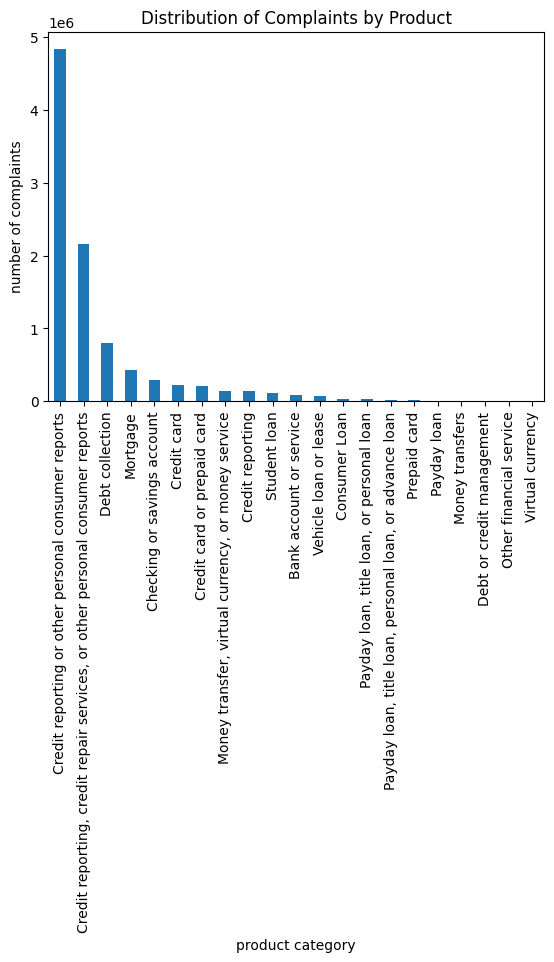

In [10]:
product_count.plot(kind='bar',title='Distribution of Complaints by Product')
plt.xlabel('product category')
plt.ylabel('number of complaints')
plt.show()

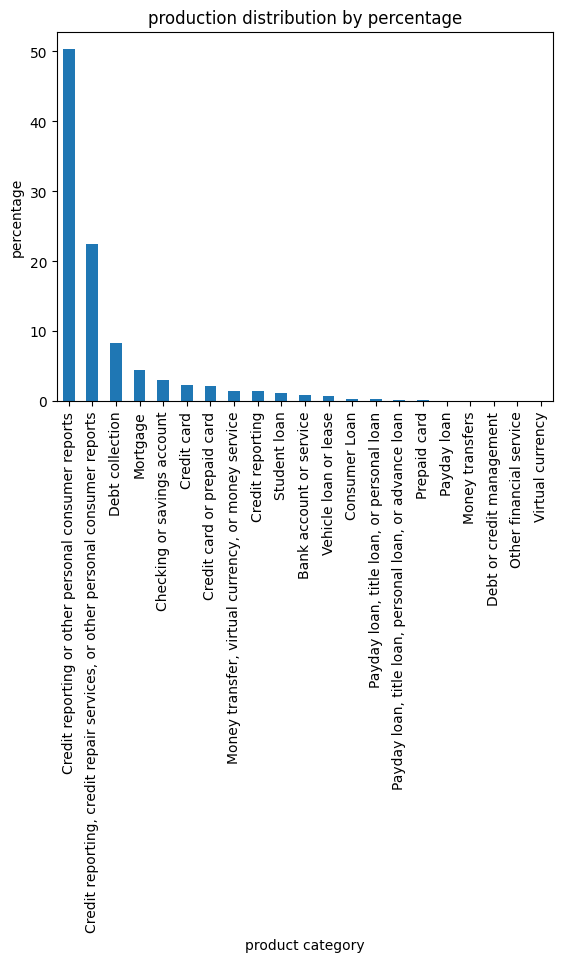

In [11]:
product_pct.plot(kind='bar',title='production distribution by percentage')
plt.xlabel('product category')
plt.ylabel('percentage')
plt.show()

In [12]:
customer_cpln = df['Consumer complaint narrative'].value_counts()
print(customer_cpln)

Consumer complaint narrative
In accordance with the Fair Credit Reporting act. The List of accounts below has violated my federally protected consumer rights to privacy and confidentiality under 15 USC 1681.\n\n15 U.S.C 1681 section 602 A. States I have the right to privacy.\n\n15 U.S.C 1681 Section 604 A Section 2 : It also states a consumer reporting agency can not furnish a account without my written instructions 15 U.S.C 1681c. ( a ) ( 5 ) Section States : no consumer reporting agency may make any consumer report containing any of the following items of information Any other adverse item of information, other than records of convictions of crimes which antedates the report by more than seven years.\n\n15 U.S.C. 1681s-2 ( A ) ( 1 ) A person shall not furnish any information relating to a consumer to any consumer reporting agency if the person knows or has reasonable cause to believe that the information is inaccurate.                                                                  

In [13]:
missing_values = df['Consumer complaint narrative'].isnull().sum()
print(f"there are {missing_values} missing Consumer complaint narratives.")

there are 6629041 missing Consumer complaint narratives.


In [14]:
df = df.dropna(subset=['Consumer complaint narrative'])

Check And Remove Missing Values 

In [15]:
missing_values = df['Consumer complaint narrative'].isnull().sum()
print(f"there are {missing_values} missing Consumer complaint narratives.")

there are 0 missing Consumer complaint narratives.


In [16]:
df['complaint_len_word'] = df['Consumer complaint narrative'].apply(lambda x:len(str(x).split()))


In [17]:
complaint_len = df['complaint_len_word'].value_counts()

In [18]:
print(complaint_len)

complaint_len_word
39      56473
157     31654
102     29020
58      27643
18      22231
        ...  
2145        1
5300        1
3365        1
5736        1
4307        1
Name: count, Length: 3868, dtype: int64


Visualize the complain By Word Count

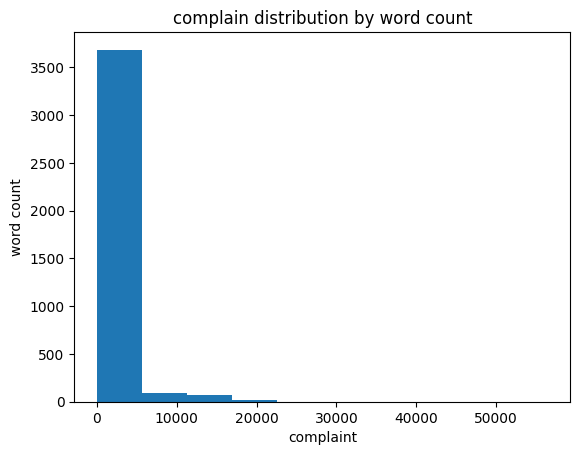

In [19]:
complaint_len.plot(kind='hist',title="complain distribution by word count")
plt.xlabel('complaint')
plt.ylabel('word count')
plt.show()

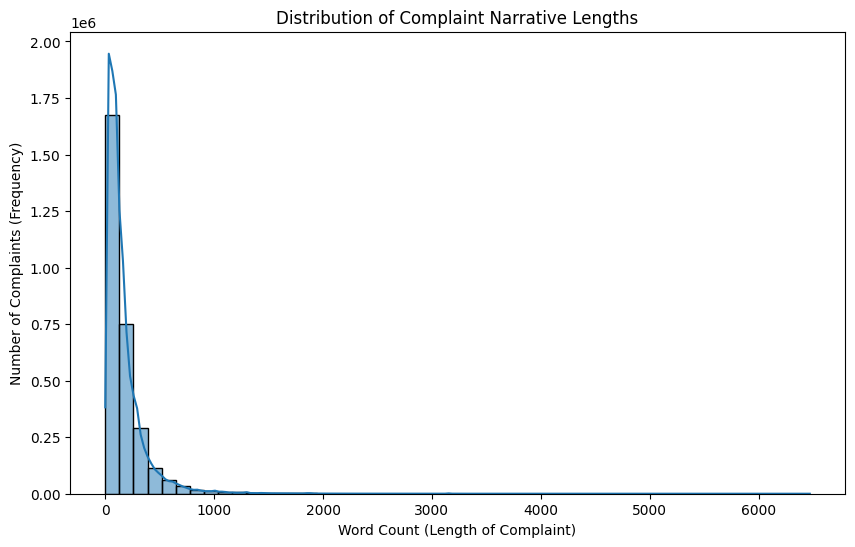

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['complaint_len_word'], bins=50, kde=True)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Word Count (Length of Complaint)')
plt.ylabel('Number of Complaints (Frequency)')
plt.show()

In [21]:
non_missing_values = df['Consumer complaint narrative'].notnull().sum()
print(f"there are {non_missing_values} non missing Consumer complaint narratives.")

there are 2980756 non missing Consumer complaint narratives.


In [22]:
missing_values = df['Consumer complaint narrative'].isnull().sum()
print(f"there are {missing_values} missing Consumer complaint narratives.")

there are 0 missing Consumer complaint narratives.


In [23]:
df.columns.to_list()

['Date received',
 'Product',
 'Sub-product',
 'Issue',
 'Sub-issue',
 'Consumer complaint narrative',
 'Company public response',
 'Company',
 'State',
 'ZIP code',
 'Tags',
 'Consumer consent provided?',
 'Submitted via',
 'Date sent to company',
 'Company response to consumer',
 'Timely response?',
 'Consumer disputed?',
 'Complaint ID',
 'complaint_len_word']

Filter the dataset to meet the project's requirements

In [24]:
df['Product'].value_counts()

Product
Credit reporting or other personal consumer reports                             1091253
Credit reporting, credit repair services, or other personal consumer reports     807281
Debt collection                                                                  336076
Checking or savings account                                                      140319
Mortgage                                                                         130160
Credit card or prepaid card                                                      108667
Money transfer, virtual currency, or money service                                97188
Credit card                                                                       80667
Student loan                                                                      53209
Vehicle loan or lease                                                             39577
Credit reporting                                                                  31587
Payday loan, title loan,

In [25]:
target_products = [
    'Credit card or prepaid card',
    'Payday loan, title loan, or personal loan'
    'Checking or savings account',
    'Money transfer, virtual currency, or money service',
    'Vehicle loan or lease',
    
]

df_filtered = df[df['Product'].isin(target_products).copy()]

In [26]:
df_filtered.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,complaint_len_word
13622,2025-06-11,Vehicle loan or lease,Loan,Repossession,Deficiency balance after repossession,Was never notified of repossession. Once repos...,Company has responded to the consumer and the ...,CREDIT ACCEPTANCE CORPORATION,TX,75070,NaN,Consent provided,Web,2025-06-11,Closed with explanation,Yes,NaN,14019199,66
15692,2025-06-07,Vehicle loan or lease,Loan,Getting a loan or lease,Confusing or misleading advertising or marketing,"I purchased a XXXX XXXX XXXX XXXX XX/XX/XXXX, ...",Company has responded to the consumer and the ...,CREDIT ACCEPTANCE CORPORATION,OH,43081,NaN,Consent provided,Web,2025-06-07,Closed with explanation,Yes,NaN,13950177,100
17118,2025-06-09,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,This all happened in XXXX and XXXX was taken f...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,75602,Servicemember,Consent provided,Web,2025-06-09,Closed with explanation,Yes,NaN,13974625,510
23639,2025-06-07,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Unauthorized transactions or other transaction...,NaN,Albert.com ( Albert Corporation ) charged me f...,Company believes the complaint provided an opp...,Albert Corporation,NY,10451,NaN,Consent provided,Web,2025-06-07,Closed with explanation,Yes,NaN,13949062,156
23670,2025-05-15,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"Managing, opening, or closing your mobile wall...",NaN,"On XX/XX/scrub> 2025, I received a XXXX paymen...",Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NY,11423,NaN,Consent provided,Web,2025-05-15,Closed with explanation,Yes,NaN,13524710,450


In [27]:
miss_values = df_filtered.dropna(subset=['Consumer complaint narrative'])

In [28]:
print(df_filtered['Consumer complaint narrative'].isnull().sum())

0


Save The Filtered Data

In [29]:
df_filtered.to_csv('../data/processed/filtered_complaint.csv',index=False)

Clean And Save Cleaned Data

In [30]:
def clean_text(text):
    text = str(text.lower())
    text = re.sub(r'x{2,}', '', text)
    text =re.sub(r'[^a-z0-9\s]',' ',text)
    text = " ".join(text.split())
    return text
df_filtered.loc[:,'cleaned_narratives'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

    

C:\Users\arwa\AppData\Local\Temp\ipykernel_15960\896052653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'cleaned_narratives'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


In [31]:
df_filtered.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,complaint_len_word,cleaned_narratives
13622,2025-06-11,Vehicle loan or lease,Loan,Repossession,Deficiency balance after repossession,Was never notified of repossession. Once repos...,Company has responded to the consumer and the ...,CREDIT ACCEPTANCE CORPORATION,TX,75070,NaN,Consent provided,Web,2025-06-11,Closed with explanation,Yes,NaN,14019199,66,was never notified of repossession once reposs...
15692,2025-06-07,Vehicle loan or lease,Loan,Getting a loan or lease,Confusing or misleading advertising or marketing,"I purchased a XXXX XXXX XXXX XXXX XX/XX/XXXX, ...",Company has responded to the consumer and the ...,CREDIT ACCEPTANCE CORPORATION,OH,43081,NaN,Consent provided,Web,2025-06-07,Closed with explanation,Yes,NaN,13950177,100,i purchased a and financed it through credit a...
17118,2025-06-09,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Fraud or scam,NaN,This all happened in XXXX and XXXX was taken f...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,TX,75602,Servicemember,Consent provided,Web,2025-06-09,Closed with explanation,Yes,NaN,13974625,510,this all happened in and was taken from my wel...
23639,2025-06-07,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,Unauthorized transactions or other transaction...,NaN,Albert.com ( Albert Corporation ) charged me f...,Company believes the complaint provided an opp...,Albert Corporation,NY,10451,NaN,Consent provided,Web,2025-06-07,Closed with explanation,Yes,NaN,13949062,156,albert com albert corporation charged me for a...
23670,2025-05-15,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"Managing, opening, or closing your mobile wall...",NaN,"On XX/XX/scrub> 2025, I received a XXXX paymen...",Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NY,11423,NaN,Consent provided,Web,2025-05-15,Closed with explanation,Yes,NaN,13524710,450,on scrub 2025 i received a payment of dollars ...


In [32]:
df_filtered.to_csv('../data/processed/cleaned_complaints.csv',index=False)